### Please install the required Python modules/SDKs

In [1]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

Could not find conda environment: ai-azure-c1
You can list all discoverable environments with `conda info --envs`.



## Importing Useful Python Libraries or package 

In [2]:

import sys
import requests
from io import BytesIO
from PIL import Image, ImageDraw


from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials


import matplotlib.pyplot as plt

## Utilitiy Functions

In [3]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

In [4]:
def show_image_object_in_cell(image_object):
    plt.figure(figsize=(20,10))
    plt.imshow(image_object)
    plt.show()

In [5]:
# TAKEN FROM THE Azure SDK Sample
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

In [6]:
def drawFaceRectangles(source_file, datected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in datected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 10)
    return img

## Accessing Specific Azure Resources 

In [7]:
KEY = "71307f07768144d6a76ee103b05d321d"
ENDPOINT = "https://nayana-face-api.cognitiveservices.azure.com/"

In [8]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

## Distracted driver image to show the changes in headpose in comparision with straight face
* Image source: https://www.kaggle.com/c/state-farm-distracted-driver-detection/overview

In [9]:
image_01 = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/statefarm-image-01.png"
image_02 = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/statefarm-image-02.png"
face_portrait = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/face-portrait.jpg"


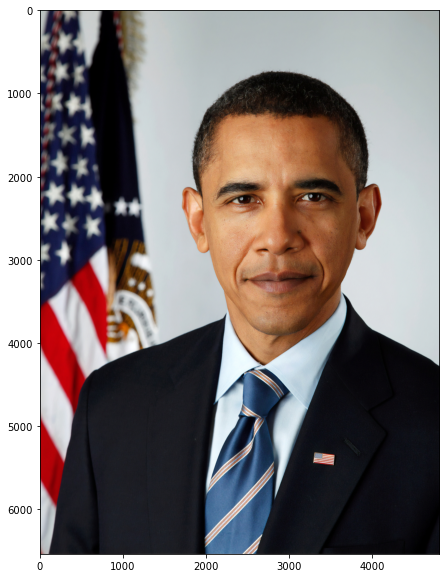

In [10]:
show_image_in_cell(face_portrait)

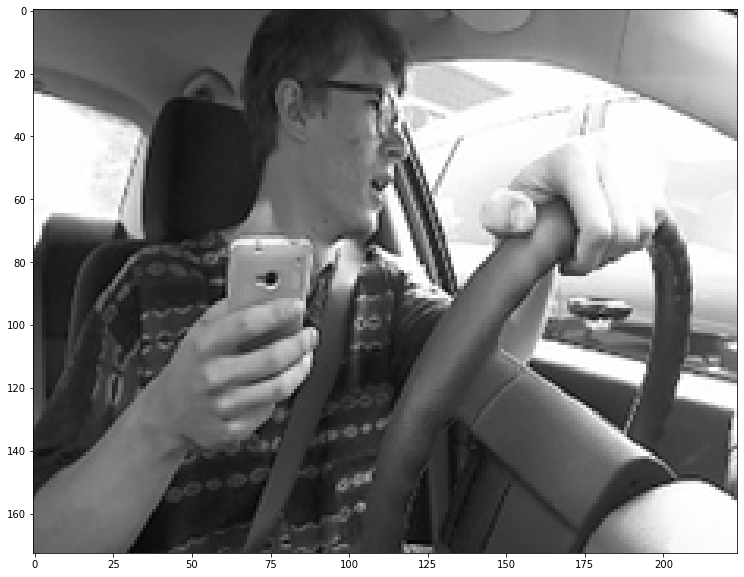

In [11]:
show_image_in_cell(image_01)

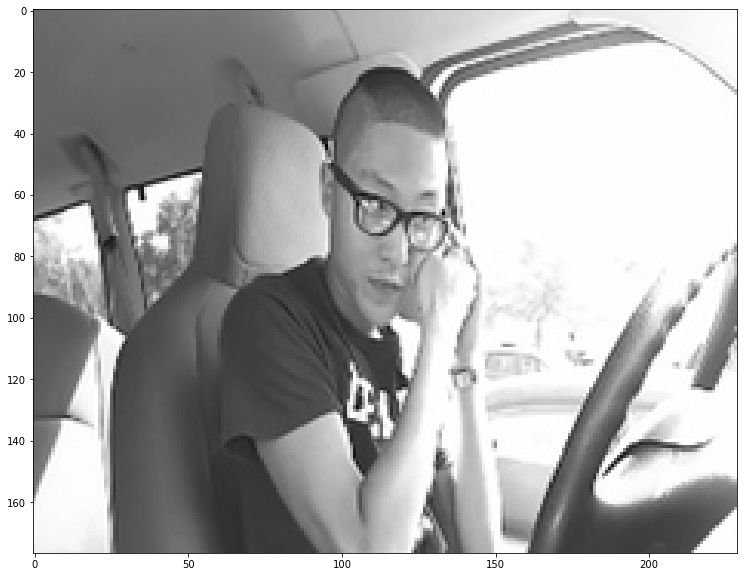

In [12]:
show_image_in_cell(image_02)

## Using Face - Detect API with detection model and face attribute parameters 

In [13]:
# Detect Face form an image
def detect_face_with_attributes_01_from_any_url(selected_image_url):
    detected_faces = face_client.face.detect_with_url(url=selected_image_url, 
                                                      detection_model='detection_03',
                                                     return_face_attributes=[
                    'headpose',
                    'mask'
                ])
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(selected_image_url))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

## Using Face - Detect API with detection model and different face attribute parameters 

In [14]:
# Detect Face form an image
def detect_face_with_attributes_02_from_any_url(selected_image_url):
    detected_faces = face_client.face.detect_with_url(url=selected_image_url, 
                                                     return_face_attributes=[
                    'age',
                    'gender',
                    'headPose',
                    'smile',
                    'facialHair',
                    'glasses',
                    'emotion',
                    'hair',
                    'makeup',
                    'occlusion',
                    'accessories',
                    'blur',
                    'exposure',
                    'noise'
                ])
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(selected_image_url))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

In [15]:
detected_faces_00_object = detect_face_with_attributes_01_from_any_url(face_portrait)

Total face(s) detected  from 1


In [16]:
for face in detected_faces_00_object: 
    print (face)

{'additional_properties': {}, 'face_id': 'cbfcd193-cc70-470b-8847-1620a31d7c09', 'recognition_model': None, 'face_rectangle': <azure.cognitiveservices.vision.face.models._models_py3.FaceRectangle object at 0x7ff8e2ca9f70>, 'face_landmarks': None, 'face_attributes': <azure.cognitiveservices.vision.face.models._models_py3.FaceAttributes object at 0x7ff8e2cb5550>}


In [17]:
for face in detected_faces_00_object: 
    print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': -1.2, 'yaw': -0.4, 'pitch': -8.6}


## Same detection model with a different image: Image_01

In [18]:
detected_faces_01_object = detect_face_with_attributes_01_from_any_url(image_01)

Total face(s) detected  from 1


In [19]:
for face in detected_faces_01_object: 
        print (face)

{'additional_properties': {}, 'face_id': '98fc0694-35fb-494e-b563-8401506b42fe', 'recognition_model': None, 'face_rectangle': <azure.cognitiveservices.vision.face.models._models_py3.FaceRectangle object at 0x7ff8e2cb5340>, 'face_landmarks': None, 'face_attributes': <azure.cognitiveservices.vision.face.models._models_py3.FaceAttributes object at 0x7ff8e2cd60a0>}


In [20]:
for face in detected_faces_01_object: 
        print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': 14.5, 'yaw': 76.7, 'pitch': 7.0}


## Same detection model with a different image: Image_02

In [21]:
detected_faces_02_object = detect_face_with_attributes_01_from_any_url(image_02)

Total face(s) detected  from 1


In [22]:
for face in detected_faces_02_object: 
        print (face.face_attributes.mask)

{'additional_properties': {}, 'type': <MaskType.no_mask: 'noMask'>, 'nose_and_mouth_covered': False}


In [23]:
for face in detected_faces_02_object: 
        print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': 10.5, 'yaw': 17.7, 'pitch': -18.9}


## Same Image Different Detection Model

In [24]:
detected_faces_001_object = detect_face_with_attributes_02_from_any_url(face_portrait)

Total face(s) detected  from 1


In [25]:
for face in detected_faces_001_object: 
        print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': -0.2, 'yaw': -0.6, 'pitch': -5.4}


## Extracting different face attributes from the face detect API result

In [26]:
for face in detected_faces_001_object: 
    print (face.face_attributes.age)
    print (face.face_attributes.emotion)
    print (face.face_attributes.gender)
    print (face.face_attributes.accessories)
    print (face.face_attributes.smile)
    print (face.face_attributes.hair)

46.0
{'additional_properties': {}, 'anger': 0.0, 'contempt': 0.001, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.259, 'neutral': 0.739, 'sadness': 0.0, 'surprise': 0.0}
Gender.male
[]
0.259
{'additional_properties': {}, 'bald': 0.48, 'invisible': False, 'hair_color': [<azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd9490>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd94c0>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd9520>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd9580>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd95e0>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd9640>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd96a0>]}


## Extracting Hair type and color face attributes from the face detect API result

In [27]:
for face in detected_faces_001_object: 
    print (face.face_attributes.hair)
    print (len(face.face_attributes.hair.hair_color))
    print (face.face_attributes.hair.hair_color[0])
    for each_hair_color in face.face_attributes.hair.hair_color:
        print (each_hair_color)

{'additional_properties': {}, 'bald': 0.48, 'invisible': False, 'hair_color': [<azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd9490>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd94c0>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd9520>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd9580>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd95e0>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd9640>, <azure.cognitiveservices.vision.face.models._models_py3.HairColor object at 0x7ff8e2cd96a0>]}
7
{'additional_properties': {}, 'color': <HairColorType.black: 'black'>, 'confidence': 1.0}
{'additional_properties': {}, 'color': <HairColorType.black: 'black'>, 'confidence': 1.0}
{'additional_properties': {}, 'color': <HairColorType.gray: 'gray'>, 'confidence': 0.91

In [28]:
for face in detected_faces_02_object: 
        print (face.face_attributes.age)

None


In [29]:
for face in detected_faces_01_object: 
        print (face.face_attributes.age)

None
